# Import Libraries

In [469]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imutils import paths
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer

np.random.seed(0)

# Load Data

In [470]:
images = []
labels = []

image_paths = list(paths.list_images('./btd'))


for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (80,80))
    
    images.append(image)
    labels.append(label)
print(images[0].shape)

(80, 80)


no


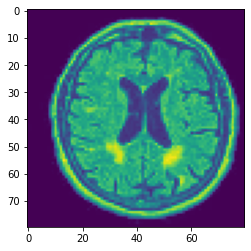

In [471]:
def plot_image(image):
    plt.imshow(image)

plot_image(images[1])
print(labels[1])

In [472]:
images = np.array(images) / 255.0
labels = np.array(labels)

print(images.shape)

(336, 80, 80)


In [473]:
#One hot encoding
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

print(labels[0])

[1. 0.]


In [474]:
(X_train, X_test, y_train, y_test) = train_test_split(images, labels, test_size=0.1, random_state=42)

In [475]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(302, 80, 80)
(302, 2)
(34, 80, 80)
(34, 2)


[0. 1.]


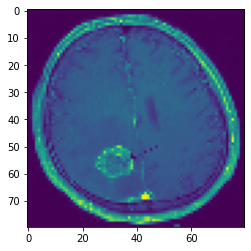

In [476]:
plot_image(X_train[40])
print(y_train[40])


## Build The Model

In [477]:
cnn = Sequential()

In [478]:
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(80,80,1), padding='same', activation='relu'))

In [479]:
cnn.add(MaxPooling2D())

In [480]:
cnn.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

In [481]:
cnn.add(MaxPooling2D())

In [482]:
cnn.add(Flatten())

In [483]:
cnn.add(Dense(100, activation='relu'))

In [484]:
cnn.add(Dense(2, activation='softmax'))

In [485]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [486]:
print(cnn.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 80, 80, 32)        832       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 20, 20, 64)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 25600)             0         
                                                                 
 dense_38 (Dense)            (None, 100)             

## Train The Model

In [487]:
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 9/10 [==========================>...] - ETA: 0s - loss: 0.5966 - acc: 0.6979WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x166c92b90> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

In [488]:
score = cnn.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5397 - acc: 0.7647
